# MA124 Maths by Computer: Assignment 4 
## Machine Learning Applied to Bike Sharing Demand Data

## Student number: u2100098

This notebook will closely follow a recent research article from the 'Computer Communications' journal. The authors sought to predict the "bike count required at each hour for the stable supply of rental bikes"[1] in order to make bike rental 'available and accessible to the public at the right time' in Seoul, South Korea. They employed several regression models, including linear regression.

In this assignment we will use a modified version of the original data set used in the article (note that only odd numbered months are included) and use machine learning to employ linear regression  and decision tree regression. Regression is used to predict the hourly rental bike demand, using a variety of factors, including: weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall); the number of bikes rented per hour; and date information.

[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. [web link](https://doi.org/10.1016/j.comcom.2020.02.007).

---

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

---
### Reading the Data from the .csv file into a Dataframe called bike_data

`bike_data` is a dataframe which stores contains the entries of the modified data set; we will use this to produce graphs to visualise the dataset. The table below shows a preview of the modified data set, the first 5 rows.

In [2]:
# Read the SeoulBikeData_mod.csv file to the DataFrame bike_data
bike_data = pd.read_csv('SeoulBikeData_mod.csv')
bike_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
0,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,1
1,230,1,-3.3,41,0.7,2000,-14.7,0.0,0.0,0.0,1
2,178,2,-3.7,42,0.9,2000,-14.7,0.0,0.0,0.0,1
3,119,3,-4.0,44,1.0,2000,-14.4,0.0,0.0,0.0,1
4,62,4,-4.2,53,1.1,1994,-12.3,0.0,0.0,0.0,1


---
### Describing the Dataframe

The table below shows some important statistics about the data set, including mean, standard deviation and quartiles of each column. This gives us a brief preview of the data, e.g. note that we have 4416 data entries, and the number of available bikes ranges from 0 to over 3000.

In [3]:
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4416.000000,4416.00000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,704.591259,11.50000,13.203986,59.257246,1.653193,1398.641304,4.723958,0.560181,0.139312,0.070879,5.956522
std,637.407244,6.92297,11.529724,20.162981,0.976361,621.560536,12.671445,0.860496,1.145271,0.437416,3.407262
min,0.000000,0.00000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,189.000000,5.75000,4.500000,44.000000,0.900000,853.000000,-3.500000,0.000000,0.000000,0.000000,3.000000
50%,542.000000,11.50000,14.300000,58.000000,1.500000,1621.000000,6.400000,0.010000,0.000000,0.000000,5.000000
75%,1047.000000,17.25000,22.200000,75.000000,2.200000,1999.000000,14.900000,0.910000,0.000000,0.000000,9.000000
max,3298.000000,23.00000,38.000000,98.000000,6.700000,2000.000000,26.800000,3.520000,35.000000,8.800000,11.000000


---
### Plotting a histogram and a box plot of Rented Bike Count

We represent the number of rented bikes available in a histogram and a boxplot. This helps visualise how many times a given number of bikes were available each hour of the day (for all odd coded months in the dataset).

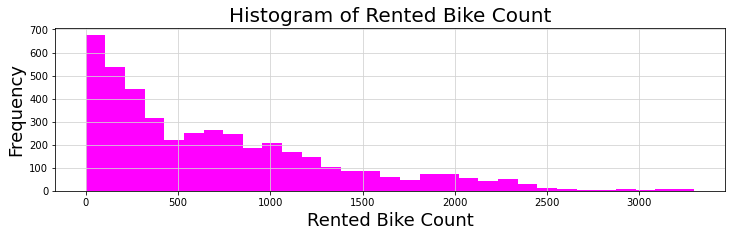

In [4]:
# Extract the rented bike count column as a numpy array
rented_bike_count = np.array(bike_data['Rented Bike Count'])

# Format the graph
plt.figure(figsize=(12,3))
plt.grid(color='lightgrey')
plt.xlabel("Rented Bike Count", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title('Histogram of Rented Bike Count', fontsize=20)

# Plot the histogram
plt.hist(rented_bike_count,bins=31,density=False,color='magenta')
plt.show()

The histogram shows that there were over 600 instances (a proportion of approximately 13% of all the data) where there were 0-100 bikes rented. This does **not** indicate that there is low demand for bikes or that there are enough bikes to meet the demand; the dataset records the number of rented bikes every hour. Considering that very few people would want to rent a bike during the hours 12-6am (for example), it is expected that the distribution is positively skewed. The boxplot below will help us understand the distribution further.

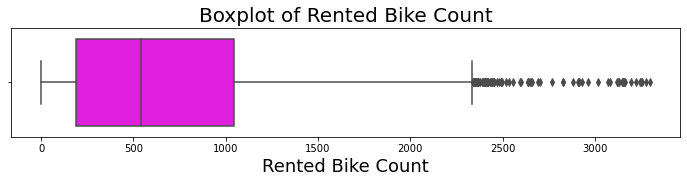

In [5]:
# Format the graph
plt.figure(figsize=(12,2))
plt.title('Boxplot of Rented Bike Count', fontsize=20)
plt.xlabel("Rented Bike Count", fontsize=18)

# Plot the boxplot
sns.boxplot(x=rented_bike_count,color='magenta')
plt.show()

We already identified that the distribution is expectedly positively skewed; note that there are a significant number of instances where the number of available bikes exceeds $Q_3 + 1.5(Q_3-Q_1) = 2334$, meaning that these are outliers. However, if the dataset was modified to exclude data from the hours of 12-6am, the data would no longer be as positively skewed as shown in the boxplot, and the number of outliers would drop significantly. This means that many more instances where the number of rented bikes exceeding $Q_3 = 1047$ would be within the accepted range. Hence, the demand of rented bikes is in fact greater than one may expect from an intital glance at the histogram and boxplot.

This motivates us to model the demand of rented bikes and to explore how different factors affect the demand, in order to maximise the chance that a bike is available when required.

---
### Plotting violin plots for the Rented Bike Count for each month/each hour of the day

A violin plot is similar to a boxplot, but also shows the probability density of each number of bikes available, represented by the width of the 'violin'. We now plot violin plots of the rented bike count for each month/hour of the day in order to identify any causes for increased/decreased demand due to date and time, e.g. as intitally hypothesised, relating to sleeping hours.

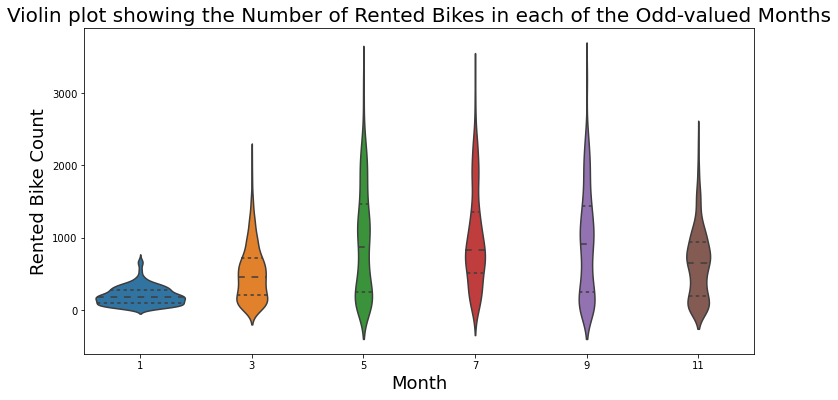

In [6]:
# Plot the violin plot for the number of rented bikes in each of the months from the dataset
plt.figure(figsize=(12,6))
plt.xlabel("Rented Bike Count", fontsize=18)
plt.ylabel("Month", fontsize=18)
plt.title('Violin plot showing the Number of Rented Bikes in each of the Odd-valued Months', fontsize=20)
sns.violinplot(y='Rented Bike Count', x='Month', data=bike_data, inner='quartile')
plt.show()

This violin plot shows how the number of rented bikes varies according to the month. In January, there were the least number of bikes rented. From November to March the number of bikes rented and the modal probability density were less than those of the months May to September. This may reflect how in Seoul City the temperature is lower from November to March than from May to September, so people are less willing to exercise in the cold, and may prefer to take the bus/train (where it is warmer).

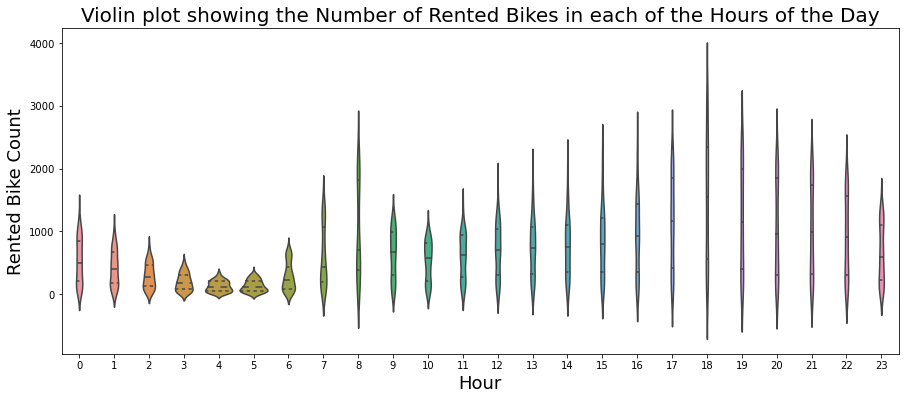

In [7]:
# Plot the violin plot for the number of rented bikes in each of the hour of the day from the dataset
plt.figure(figsize=(15,6))
plt.xlabel("Rented Bike Count", fontsize=18)
plt.ylabel("Hour", fontsize=18)
plt.title('Violin plot showing the Number of Rented Bikes in each of the Hours of the Day', fontsize=20)
sns.violinplot(y='Rented Bike Count', x='Hour', data=bike_data, inner='quartile')
plt.show()

This violin plot shows how the number of available bikes varies according to the hour of the day. The modal hour was 18:00, followed by 19:00 and 08:00, which are the hours most people come back from/go to work, explaining the increased number of bikes rented. The number of bikes rented increases steadily from 09:00 to 17:00, since  more people begin to wake up and are ready for travel, and then facilities like shops etc. open and become more busy. The least number of bikes were rented in the hours 01:00-06:00, since most people are sleeping at this time, confirming our earlier suspicion.

---
### Creating a new dataframe X and a series y, preparing for a test-train split and linear regression modelling

In [8]:
# Create a dataframe X which excludes the rented bike count
X = bike_data.drop(['Rented Bike Count'], axis=1)
# Create a series y which is the rented bike count
y = bike_data['Rented Bike Count']

X.describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4416.00000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,11.50000,13.203986,59.257246,1.653193,1398.641304,4.723958,0.560181,0.139312,0.070879,5.956522
std,6.92297,11.529724,20.162981,0.976361,621.560536,12.671445,0.860496,1.145271,0.437416,3.407262
min,0.00000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,5.75000,4.500000,44.000000,0.900000,853.000000,-3.500000,0.000000,0.000000,0.000000,3.000000
50%,11.50000,14.300000,58.000000,1.500000,1621.000000,6.400000,0.010000,0.000000,0.000000,5.000000
75%,17.25000,22.200000,75.000000,2.200000,1999.000000,14.900000,0.910000,0.000000,0.000000,9.000000
max,23.00000,38.000000,98.000000,6.700000,2000.000000,26.800000,3.520000,35.000000,8.800000,11.000000


X and y will become the design matrix and the target vector respectively for the test-train split.

---
### Performing a Test-Train split

From page 5 of the article, (page 357 of the Computer Communications journal):

"The final consolidated rental bike data is partitioned into two namely, training set for building the regression and testing set for assessing the model performance by using the data partition function generated by CARET package. Usually larger part of data is need to teach the models and so the 75% of the final data is utilized for model training and the remaining 25% of the data is used for testing purpose."

Hence, in a similar manner to the article, we allocate 75% of the data for training and 25% of the data for testing.

**Note that these allocations are random, so every time the cells below and onwards are run, the statistics and graphs will change. From this point onwards, I will discuss mean statistics from multiple previous generations, and graphs from an earlier generation.**

In [9]:
# Create a train-test split with a test size of 20% of the total samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

---
### Creating and Training a Linear Regression Model
Here we use machine learning to train a linear regression model to fit the dataframe.

In [10]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

LinearRegression()

---
### Using the Regression Model to obtain a Prediction on the test data and Forming the Residuals
We use the trained linear regression model to predict the frequency of each rented bike count for each of the data points in the test data. We then form the residual which is the error between the predicted and true frequencies.

In [11]:
# Use the model to predict the test data
y_pred = regr.predict(X_test)

# Form the residual which represents the error between the test (true) and predicted values
resid = y_test - y_pred

---
### Computing and Reporting Performance Measures

We will compute the following five performance metrics: Rsquared (R2), the Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE), and the Coefficient of Variation (CV). These are scalar measures of how well `y_test` and `y_pred` agree. (Figures quoted in the description refer to means of multiple test-train splits.)

In [12]:
# Computing the root mean squared error
RMSE = np.sqrt(np.mean(resid**2))
# Computing the mean absolute error
MAE = np.mean(np.abs(resid))
# Computing the coefficient of variation
CV = 100 * RMSE/np.mean(y_test)
# Computing r**2using scikit-learn
r2 = r2_score(y_test, y_pred)

print('Here are the 5 performance metrics:')
print('The root mean squared error (RMSE) is: ',RMSE)
print('The mean absolute error (MAE) is: ',MAE)
print('The coefficient of variation (CV) rounded to 2 decimal places is: ',np.round(CV,2),'%')
print('R squared (r2) is: ',r2)

Here are the 5 performance metrics:
The root mean squared error (RMSE) is:  461.60294217535517
The mean absolute error (MAE) is:  342.0140382442172
The coefficient of variation (CV) rounded to 2 decimal places is:  68.87 %
R squared (r2) is:  0.45113332450172927


The 'Computer Communications' study also calculated these performance metrics for multiple regression types. For linear regression the statistics for R2, RMSE, MAE and CV were 0.55, 427.71, 322.32 and 61.03%. After averaging 5 statistics from previously generated test-train splits, our statistics for R2, RMSE, MAE and CV were 0.47, 466.54, 342.03 and 66.50%. Note that our statistics are extremely similar; the dataset we used is identical to the one the study used but with half of the data omitted. Since we used a large number of over 4000 data points, and the study used over 8000, it makes sense that both have similar distibutions, lending to similar performance metric statistics.

---
### Graphical Representation of Data
Here we plot multiple graphs in order to evaluate the accuracy of the regression model.

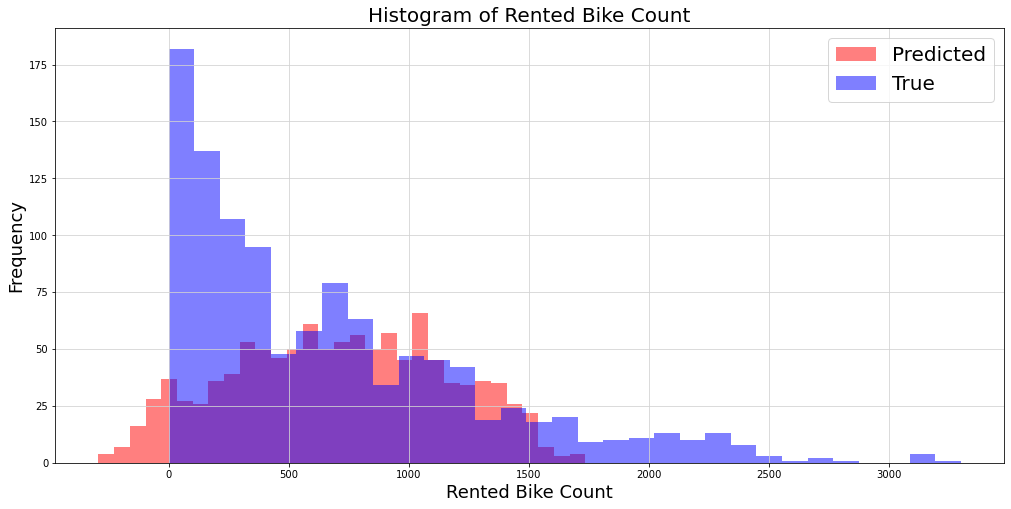

In [13]:
# 1) Histograms of the predicted and test/true y values for Rented Bike Count

# Format the graph
plt.figure(figsize=(17,8))
plt.grid(color='lightgrey')
plt.xlabel("Rented Bike Count", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title('Histogram of Rented Bike Count', fontsize=20)
# Plot the histograms
plt.hist(y_pred,bins=31,density=False,color='red',label='Predicted',alpha=0.5)
plt.hist(y_test,bins=31,density=False,color='blue',label='True',alpha=0.5)
plt.legend(fontsize=20)
plt.show()

The histogram above shows the test data for the frequency for each number of rented bikes, and the predicted frequencies using our linear regression model. Note that the distributions are quite dissimilar; the modal number of rented bikes was actually 0-100, but the regression predicted it to be from 600-700. Furthermore, the true distibution is extremly positively skewed, but the predicted distribution is bell-shaped/normal. This indicates that our regression model is not very accurate, and that the original data is not linear. Furthermore, the model shows frequencies for negative values of rented bikes, which is clearly impossible. This also shows how the linear regression model is not a good fit for the distribution of our data.

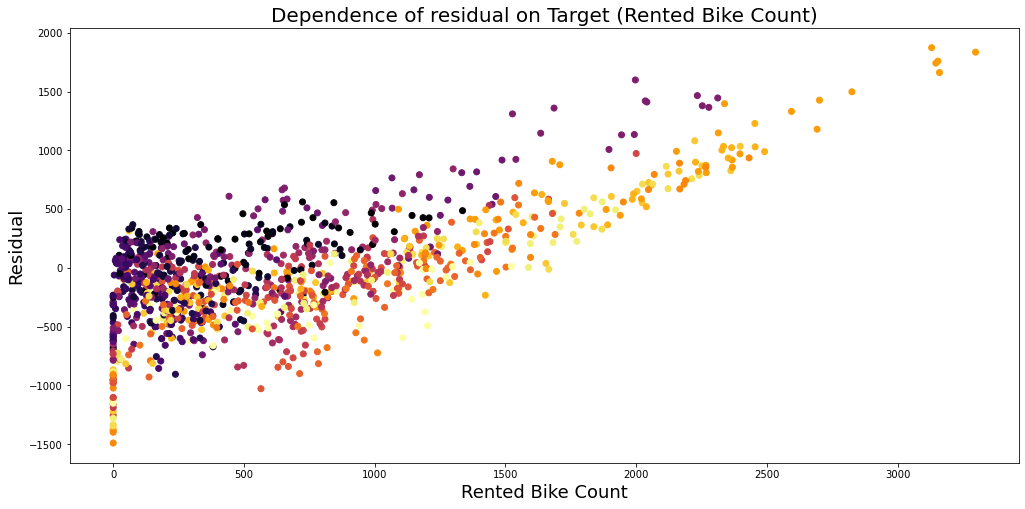

In [14]:
# 2) Scatter plot of the residuals against y_test
plt.figure(figsize=(17,8))
ax1 = plt.subplot()
ax1.scatter(y_test, resid, c = X_test['Hour'], cmap = 'inferno')
plt.xlabel("Rented Bike Count", fontsize="18")
plt.ylabel("Residual", fontsize="18")
plt.title("Dependence of residual on Target (Rented Bike Count)", fontsize="20")
plt.show()

The scatter plot above shows how the residual varies as the number of rented bikes increases. The residual represents the diffrence between the true and predicted frequencies; this graph will help us see whether the model correctly predicts the number of rented bikes, comparing to the test data. The scatter graph shows that when the rented bikes count is low, the residuals are also low, and that as rented bike count increases, so does the residual. Note that the different hours of the day are represented using the inferno colormap. This shows us the same general trend for each hour of the day: as the rented bike couunt increases, the residual for that month also increases. This means that our linear regression is a poor model for high numbers of rented bikes. This shows that out model does not accurately predict the numbers of rented bikes based on the given parameters.

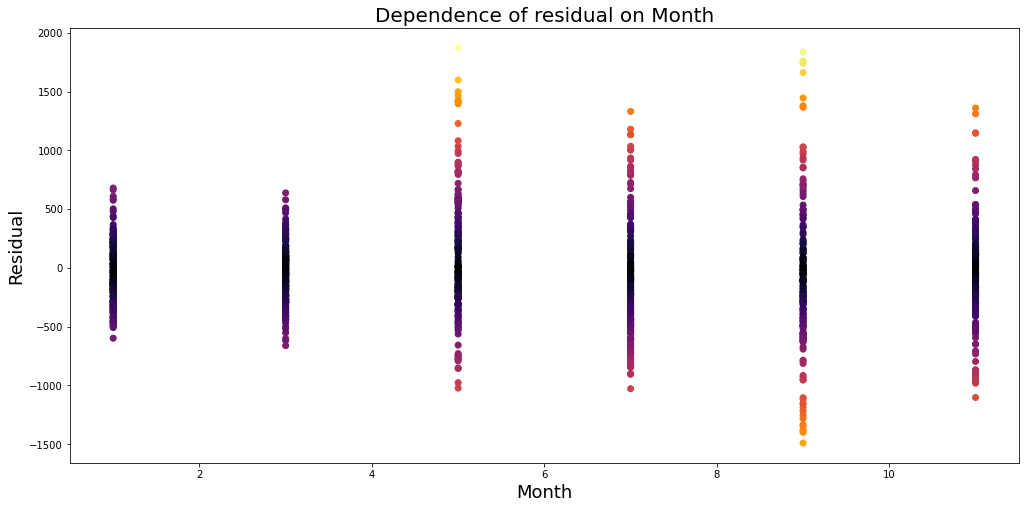

In [15]:
# 3) Scatter plot of the residuals against month
plt.figure(figsize=(17,8))
ax1 = plt.subplot()
ax1.scatter(X_test['Month'], resid, c = np.abs(resid), cmap = 'inferno')
plt.xlabel("Month", fontsize="18")
plt.ylabel("Residual", fontsize="18")
plt.title("Dependence of residual on Month", fontsize="20")
plt.show()

The scatter plot above shows how the residuals change depending on the month, shown with the inferno colormap to represent the absolute value of the residual. This shows how the residuals are much higher in the months May, September and November. This may be due to the high variation in the parameters in these months, e.g. in November there is a high variation in Temperature and Solar Radiation, and high variation in Rainfall in September. This shows us that the linear regression model is unable to form a good fit for the all of the parameters using a linear model, and that we will require a more complex model.

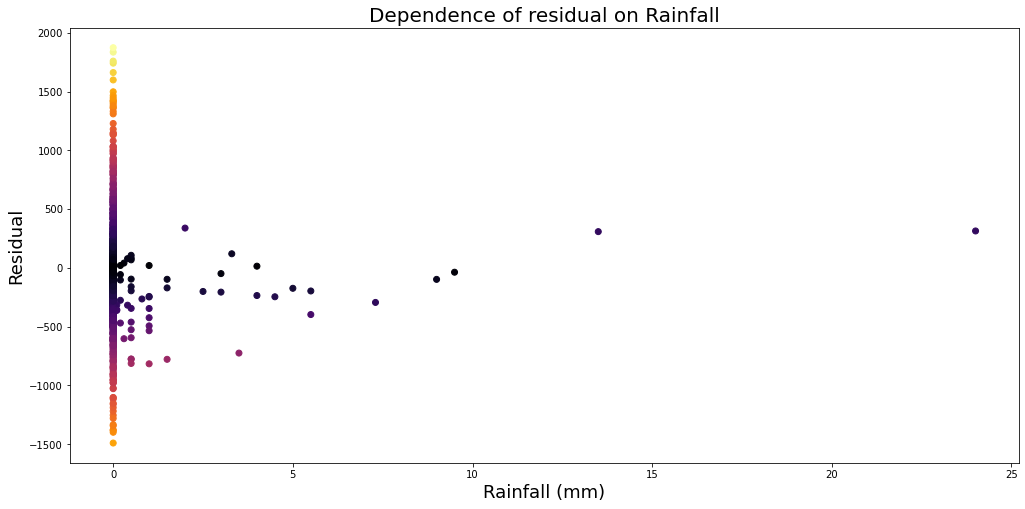

In [16]:
# 4) Scatter plot of the residuals against rainfall
plt.figure(figsize=(17,8))
ax1 = plt.subplot()
ax1.scatter(X_test['Rainfall(mm)'], resid, c = np.abs(resid), cmap = 'inferno')
plt.xlabel("Rainfall (mm)", fontsize="18")
plt.ylabel("Residual", fontsize="18")
plt.title("Dependence of residual on Rainfall", fontsize="20")
plt.show()

The scatter plot above shows how the residuals change depending on rainfall, also shown with the inferno colormap for the absolute value of the residual. Note that the absolute value of the residual is high during low levels of rainfall; this shows that the linear regression model is unable to accurately predict the numbers of bikes that are rented when there is no rainfall. Note that as soon as the rainfall is non zero, the residuals become much smaller in magnitude, showing that our linear regression model is accurate in modelling how people are less likely to use a rented bike when it is raining outside. This means that it is the other parameters that are causing the model to be inacurate.

---
### Using Trees to Create a Regression that Fits the Data Better
We observed that the linear regression model is not a good fit for the data; here we attempt to create a more accurate model using trees. We repeat the previous calculations for the performance metrics and the histograms, but for the new model.

In [17]:
# Fit regression model
regr = DecisionTreeRegressor(max_depth=8)
regr.fit(X_train, y_train)

# Predict
y_pred = regr.predict(X_test)

# Form the residual which represents the error between the test (true) and predicted values
resid = y_test - y_pred

# Computing the root mean squared error
RMSE = np.sqrt(np.mean(resid**2))
# Computing the mean absolute error
MAE = np.mean(np.abs(resid))
# Computing the coefficient of variation
CV = 100 * RMSE/np.mean(y_test)
# Computing r**2using scikit-learn
r2 = r2_score(y_test, y_pred)

print('Here are the 5 performance metrics:')
print('The root mean squared error (RMSE) is: ',RMSE)
print('The mean absolute error (MAE) is: ',MAE)
print('The coefficient of variation (CV) rounded to 2 decimal places is: ',np.round(CV,2),'%')
print('R squared (r2) is: ',r2)

Here are the 5 performance metrics:
The root mean squared error (RMSE) is:  362.7411740513889
The mean absolute error (MAE) is:  223.36955440620153
The coefficient of variation (CV) rounded to 2 decimal places is:  54.12 %
R squared (r2) is:  0.6610595237025811


As before, I averaged 5 previous generations for the performance metrics used before, but for our new model. The statistics for R2, RMSE, MAE and CV were: 0.62, 398.03, 248.05 and 55.83%. The values vary significantly from our previous model using linear regression; first note that the r squared value has risen from 0.47 to 0.62, meaning that a greater proportion of the variance in the rented bike count is explained by the facotrs (rainfall, temperature etc.). Furthermore, the root mean squared error and the mean absolute error have both decreases, meaning that the difference between the model and the test data is lower. The coefficient of variation has also decreased, meaning that there is less dispersion from the mean, indicating that the new model is better.

These metrics indicate the new model will be more accurate than the linear regression model. We will investigate this using the histogram.

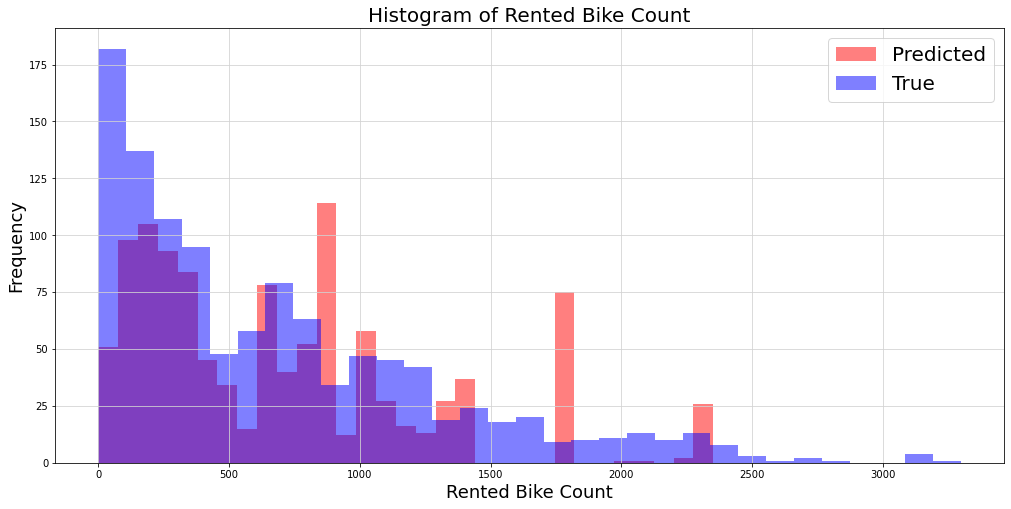

In [18]:
# Histograms of the predicted and test/true y values for Rented Bike Count
# Format the graph
plt.figure(figsize=(17,8))
plt.grid(color='lightgrey')
plt.xlabel("Rented Bike Count", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title('Histogram of Rented Bike Count', fontsize=20)

# Plot the histograms
plt.hist(y_pred,bins=31,density=False,color='red',label='Predicted',alpha=0.5)
plt.hist(y_test,bins=31,density=False,color='blue',label='True',alpha=0.5)
plt.legend(fontsize=20)
plt.show()

The histogram confirms our hypothesis that the new model is more accurate; the distribution of the predicted frequencies is now also positively skewed like the test data, whereas the linear model had a bell-shaped distribution. Also note that for all values of rented bike count the frequency is 0, unlike the linear model, which had frequencies for negative numbers of rented bikes; an absurdity. It is clear that the new model fits the data more accurately, and may be further improved using a greater maximum depth for the decision tree regressor.

We could extend this project by plotting similar graphs to the linear model for the new model, showing how the residuals change according to the number of rented bikes for the multiple factors (rainfall, temperature, etc.). This would show whether that the new model fits the data particularly well or not.